# Ford GoBike System Data (Year-2019)
## by *Akshay Kumar*

## Investigation Overview

> The dataset used here is from Bay Wheel(previously known as Ford GoBike) System for year 2019. The objective of this investigation is to analyse the in bike rental pattern based on different days of week, month and year. Also we would like to look at whether there is variation in bike renting depending on whether a user is subscriber or casual customer. 

## Dataset Overview

> About the Dataset:
- Bay Wheels(previously known as Ford GoBike) is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.
- This data set includes information about individual rides made in this bike-sharing system covering the greater San Francisco Bay area, in year 2019.

- The dataset was collected from January 2019 through December 2019. Dataset documents almost 2,500,000 rides in the San Francisco Bay area.

1. The various features in dataset are as follows:

    - Ride Duration in seconds
    - Start Timestamp
    - End Timestamp
    - Start Station ID and name
    - Start Station coordinates in latitude and longitude
    - End Station ID and name
    - End Station coordinates in latitude and longitude
    - Bike ID
    - User Type(Subscriber or Customer)
    
    
2. Additional feturess derived as result of transformation and cleaning:

    - Start Time Hour
    - Start Time Weekday
    - Start Time Month	
    - Ride duration in minutes


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
df_new = pd.read_csv('master_dataset_mk2.csv')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407259 entries, 0 to 2407258
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  duration_min             int64  
 14  start_month              object 
 15  start_weekday            object 
 16  start_hour               int64  
dtypes: float64(6), int64(4), object(7)
memory usage: 312.2+ MB


In [9]:
# convert object type to datetime in start and end time
df_new['start_time'] = pd.to_datetime(df_new['start_time'])
df_new['end_time'] = pd.to_datetime(df_new['end_time'])

weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# set user type, month and weekday as ordinal categorical variable

df_new['user_type'] = pd.Categorical(df_new['user_type'], categories = ['Subscriber', 'Customer'], ordered = True)

df_new['start_month'] = pd.Categorical(df_new['start_month'], categories = months, ordered = True)

df_new['start_weekday'] = pd.Categorical(df_new['start_weekday'], categories=weekdays, ordered=True)

df_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407259 entries, 0 to 2407258
Data columns (total 17 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2407259 non-null  int64         
 1   start_time               2407259 non-null  datetime64[ns]
 2   end_time                 2407259 non-null  datetime64[ns]
 3   start_station_id         2407259 non-null  float64       
 4   start_station_name       2407259 non-null  object        
 5   start_station_latitude   2407259 non-null  float64       
 6   start_station_longitude  2407259 non-null  float64       
 7   end_station_id           2407259 non-null  float64       
 8   end_station_name         2407259 non-null  object        
 9   end_station_latitude     2407259 non-null  float64       
 10  end_station_longitude    2407259 non-null  float64       
 11  bike_id                  2407259 non-null  int64         
 12  

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Number of Users in Each User Type

> The Bike sharing system is used more often by *subscribers* than *casual customers*.

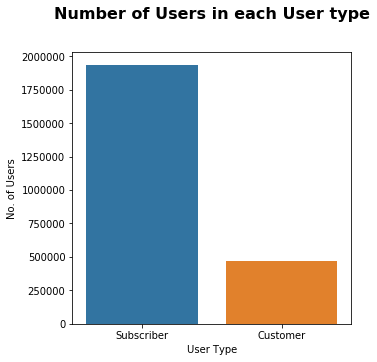

In [12]:
# number of Users in each user type
plt.figure(figsize=[5, 5])
orders = df_new.user_type.value_counts().index
sb.countplot(data = df_new, x='user_type', order=orders);
plt.xlabel('User Type');
plt.ylabel('No. of Users');
plt.title('Number of Users in each User type', fontsize = 16, y = 1.1, fontweight='semibold');

## Usage based on Months

> Overall share system is used most in months of *March, October and April* and least in *December*(maybe due to winter).

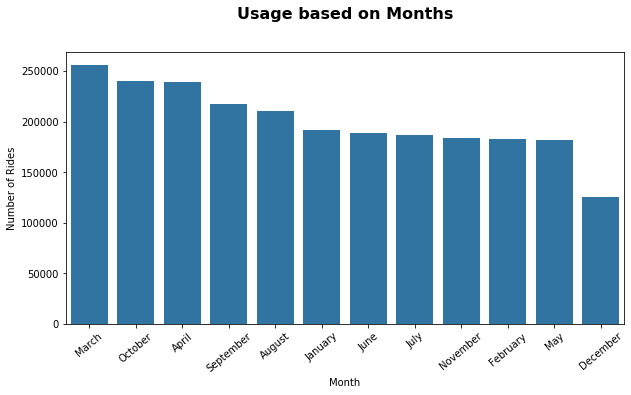

In [15]:
# usage on different months of year 2019
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 5])
months = list(df_new['start_month'].unique())
cat_order1 = df_new['start_month'].value_counts().index
sb.countplot(data = df_new, x = 'start_month', color = base_color, order = cat_order1);
plt.xticks(rotation = 40);
plt.xlabel('Month');
plt.ylabel('Number of Rides');
plt.title('Usage based on Months', y=1.1, fontsize=16, fontweight='semibold');

## Usage by Weekdays

> The bike sharing system was used more often by subscribers on weekdays with a significant drop on weekends. No such trend was observed for casual customers where number of rides remains relatively constant. We can infer that bike sharing is used more often by subscribers for daily commute to offices and workspaces. 

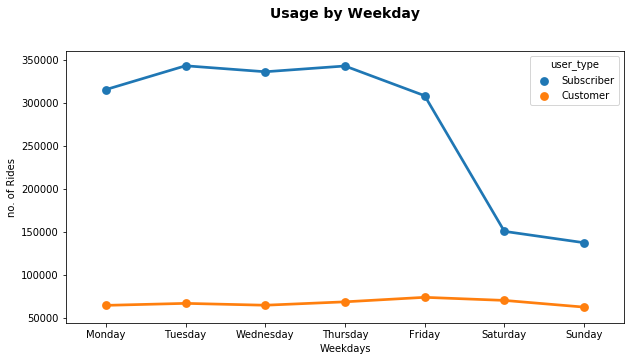

In [14]:
# usage by weekdays

plt.figure(figsize = [10, 5])

ct_count = df_new.groupby(['start_weekday', 'user_type']).size()
ct_count = ct_count.reset_index()
sb.pointplot(data=ct_count, x = 'start_weekday',  hue = 'user_type', y = 0);
plt.xlabel('Weekdays')
plt.ylabel('no. of Rides');
plt.title('Usage by Weekday', y = 1.1, fontsize = 14, fontweight = 'semibold');

## Duration of Rides on different weekdays per User Type

> It can be seen that casual customers use bike sharing for longer durations (18-20 minutes during weekdays and 27-30 minutes during weekends) than subscribers(who ride for around 10 minutes on weekdays and 12 minutes on weekends). This difference is significant during weekends. 

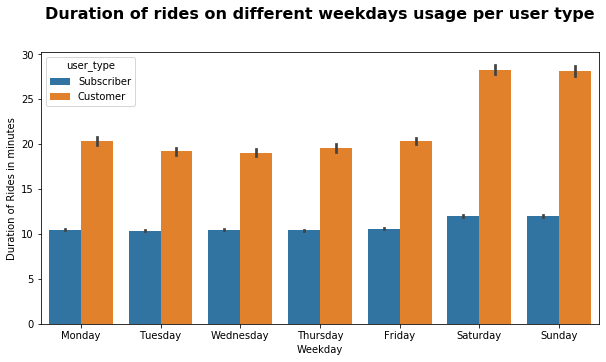

In [11]:
# Duration of bike rides on different weekdays usage for different user types
plt.figure(figsize = [10, 5])

ax = sb.barplot(data = df_new, x = "start_weekday", y = "duration_min", hue = "user_type");
plt.xlabel('Weekday');
plt.ylabel('Duration of Rides in minutes')
plt.title("Duration of Rides on different weekdays per User Type", y = 1.1, fontsize = 16, fontweight = 'semibold');

## Weekly Usage at different hours per User Type

> This plot summarizes many things at once.

> First we can see that ***subscribers*** use the bike sharing system mainly on *weekdays*. Large number of bike sharing happens between **7AM** and **9AM** and between **4PM** and **7PM**. Number of bike sharing is at peak on **Tuesday at 8AM** where more than 45,000 subscribers using it. There is significant drop on weekends with number of rides between 10,000 and 15,000 .

> Second,  we can see that ***casual customers*** use the bike sharing system on *weekdays* as well as on *weekends*. But the timings differ between weekdays and weekends. During weekdays, large number of bike sharing happens between **7AM** and **9AM** and between **4PM** and **7PM**. Number of bike sharing is at peak on **Tuesday at 8AM and 5PM** where more than 7,000 customers using it. During weekends number of bike rides is at more between **10AM** and **6PM**.

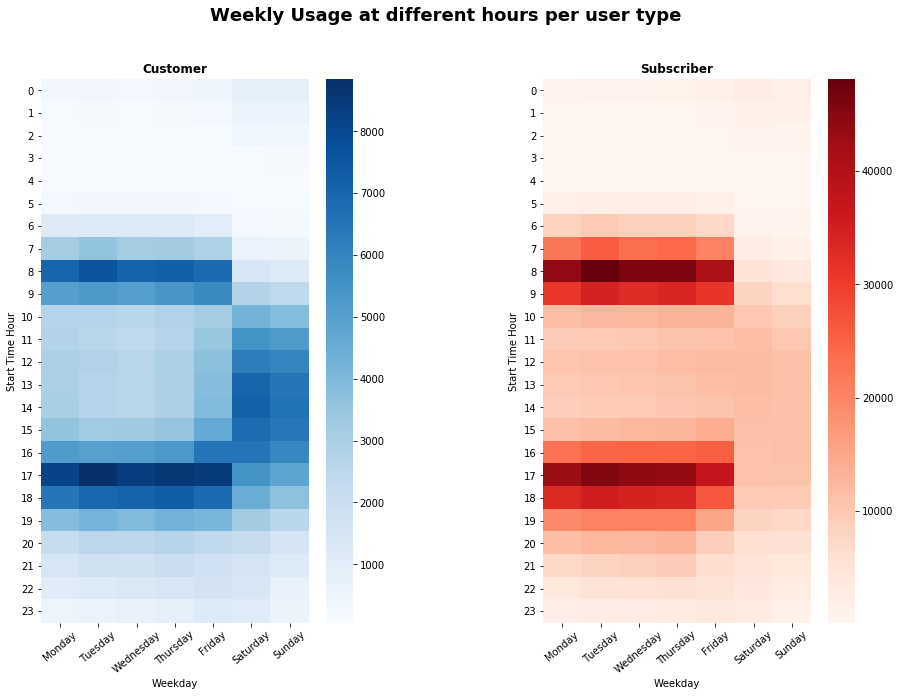

In [10]:
plt.figure(figsize = [15,10])

plt.suptitle('Weekly Usage at different hours per user type', fontweight = 'semibold', fontsize = 18);

# plot heatmap for customer
plt.subplot(1, 2, 1)
ct_count1 = df_new.query("user_type == 'Customer'").groupby(['start_hour', 'start_weekday'])['bike_id'].size() 
ct_count1 = ct_count1.reset_index()
ct_count1 = ct_count1.pivot(index = "start_hour", columns = "start_weekday", values = "bike_id")
sb.heatmap(ct_count1, cmap='Blues')
plt.xlabel('Weekday');
plt.ylabel('Start Time Hour');
plt.xticks(rotation = 40)
plt.yticks(rotation = 0)
plt.title("Customer", fontweight = 'semibold');

# plot heatmap for subscriber
plt.subplot(1, 2, 2)
ct_count2 = df_new.query("user_type == 'Subscriber'").groupby(['start_hour', 'start_weekday'])['bike_id'].size()
ct_count2 = ct_count2.reset_index()
ct_count2 = ct_count2.pivot(index = 'start_hour', columns = 'start_weekday', values = 'bike_id')
sb.heatmap(ct_count2, cmap='Reds')
plt.xlabel('Weekday');
plt.ylabel('Start Time Hour');
plt.xticks(rotation = 40)
plt.yticks(rotation = 0)
plt.title('Subscriber', fontweight = 'semibold');

plt.subplots_adjust(wspace = 0.5)

## Number of rides across different durations per User Type

> The bike sharing service is **used more by subscribers** but the *ride durations* on average are a bit **longer for casual customers** (4 to 20 minutes) than for subscribers (3 to 12 minutes).

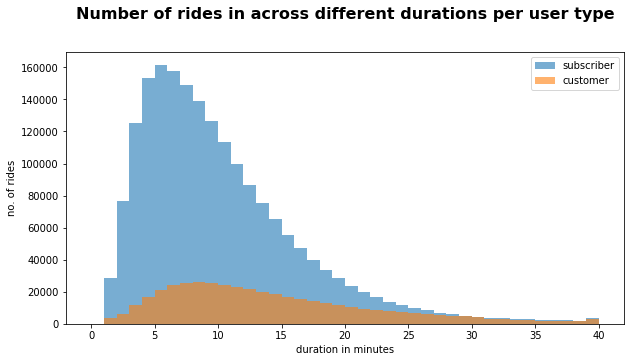

In [13]:
# number of rides in across different durations per user type
plt.figure(figsize = [10, 5])

df_cust = df_new.query("user_type == 'Customer'")
df_cust = df_cust.query("duration_min < 41")

df_subs = df_new.query("user_type == 'Subscriber'")
df_subs = df_subs.query("duration_min < 41")

bins = np.arange(0, 41, 1)
plt.hist(data = df_subs, x = 'duration_min', bins = bins, alpha = 0.6, label = 'subscriber');
plt.hist(data = df_cust, x = 'duration_min', bins = bins, alpha = 0.6, label = 'customer');
plt.xlabel('duration in minutes');
plt.ylabel('no. of rides');
plt.title('Number of rides in across different durations per User Type', y = 1.1, fontweight = 'semibold', fontsize = 16);
plt.legend(loc = 'upper right');

## Summary

> The bike sharing system is used more by subscribers than casual customers. On the other hand the *ride durations* on average are a bit *longer for casual customers* (4 to 20 minutes) than for subscribers (3 to 12 minutes). We can see that *subscribers* use the bike sharing system mainly on *weekdays* and *casual customers* use the bike sharing system on *weekdays* as well as on *weekends* alike.

> Also in subscribers large number of bike sharing happens between 7AM and 9AM and between 4PM and 7PM. In customers during weekdays, large number of bike sharing happens between 7AM and 9AM and between 4PM and 7PM. During weekends number of bike rides is at more between 10AM and 6PM.

> Overall share system is used most in months of *March, October and April* and least in *December*(maybe due to winter).

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!